<a href="https://colab.research.google.com/github/ShreyaSrivastava12/Projects/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)
path="/content/drive/MyDrive/card_transdata.csv"
df=pd.read_csv(path)
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [12]:
df.isnull().head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [13]:
 df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [14]:
 df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [15]:
#convert float data types column to integer
df['repeat_retailer'] = (df['repeat_retailer']).astype(int)
df['used_chip'] = (df['used_chip']).astype(int)
df['used_pin_number'] = (df['used_pin_number']).astype(int)
df['online_order'] = (df['online_order']).astype(int)
df['fraud'] = (df['fraud']).astype(int)
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                     int64
used_chip                           int64
used_pin_number                     int64
online_order                        int64
fraud                               int64
dtype: object

In [16]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


0    912597
1     87403
Name: fraud, dtype: int64


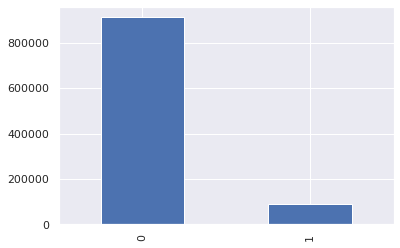

In [17]:
#Counting 1 and 0 Value in fraud column
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = df["fraud"].map(lambda x: color_wheel.get(x + 1))
print(df.fraud.value_counts())
p=df.fraud.value_counts().plot(kind="bar")

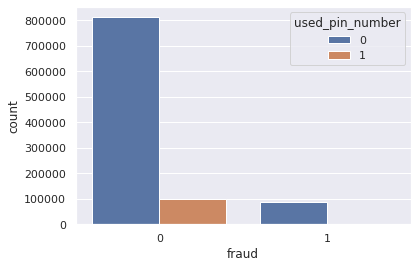

In [18]:
sns.countplot(data=df, x="fraud", hue="used_pin_number")

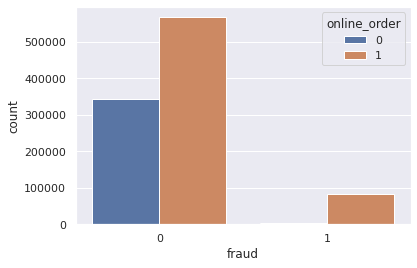

In [19]:
sns.countplot(data=df, x="fraud", hue="online_order")

In [20]:
X = df.drop('fraud', axis=1)
y = df['fraud']

In [21]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=7)

In [22]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
y_pred = dtree.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 99.9985 %


In [24]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [25]:
y_pred = nb.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 95.1595 %


In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 100.0 %


In [30]:
#importing classification report and confusion matrix from sklearn
from sklearn.metrics import classification_report, confusion_matrix

Text(0.5, 1.0, 'Accuracy Score: 1.0')

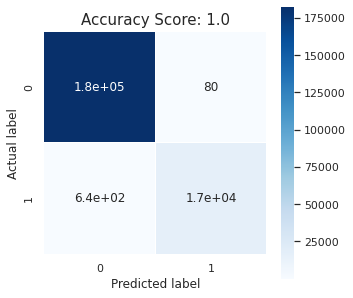

In [31]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [40]:
imp_df = pd.DataFrame({"Feature Name": X_train.columns,"Importance": rfc.feature_importances_})
imp_df.sort_values(by="Importance", ascending=False)

,Feature Name,Importance
2,ratio_to_median_purchase_price,0.527237
6,online_order,0.170204
0,distance_from_home,0.132096
5,used_pin_number,0.063294
4,used_chip,0.058373
1,distance_from_last_transaction,0.042806
3,repeat_retailer,0.005990
